# SiPANN

We can also leverage the sipann compact model library.

SIPANN provides with a linear regression fit from mode solver simulations to compute the Sparameters.

## Straight

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gdsfactory as gf
import gdsfactory.simulation.sipann as gs


def pltAttr(x, y, title=None, legend="upper right", save=None):
    if legend is not None:
        plt.legend(loc=legend)
    plt.xlabel(x)
    plt.ylabel(y)
    if title is not None:
        plt.title(title)
    if save is not None:
        plt.savefig(save)


s = gs.straight(width=0.5)

2022-11-07 00:16:58.312 | INFO     | gdsfactory.config:<module>:45 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 5.54.0


2022-11-07 00:16:59.536150: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-07 00:16:59.579173: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2022-11-07 00:17:00.504517: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-07 00:17:00.504619: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-11-07 00:17:00.504630: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/SiPANN/scee.py:1871: UserWarning: Width is less than 400nm, may produce invalid results
  warnings.warn(


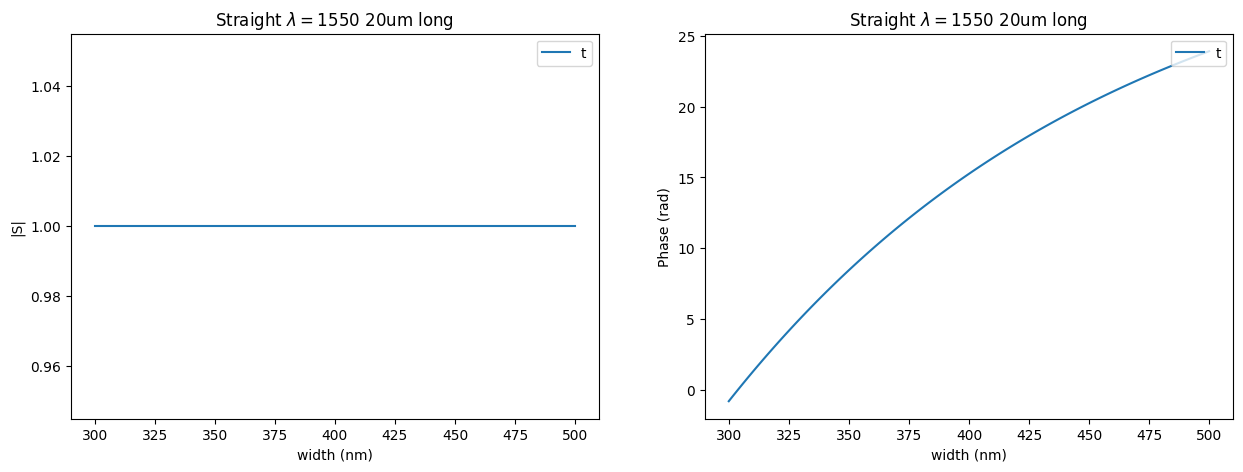

In [2]:
hr = gs.straight(wg_width=0.45, length_x=20.0)
width = np.linspace(300, 500, 100)
wavelength = 1550
hr.update(width=width)
t = hr.predict(wavelength)

title = "Straight $\lambda=1550$ 20um long"
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(width, np.abs(t) ** 2, label="t")
pltAttr("width (nm)", "|S|", title)

plt.subplot(122)
plt.plot(width, -np.unwrap(np.angle(t)), label="t")
pltAttr("width (nm)", "Phase (rad)", title)

## Coupler ring

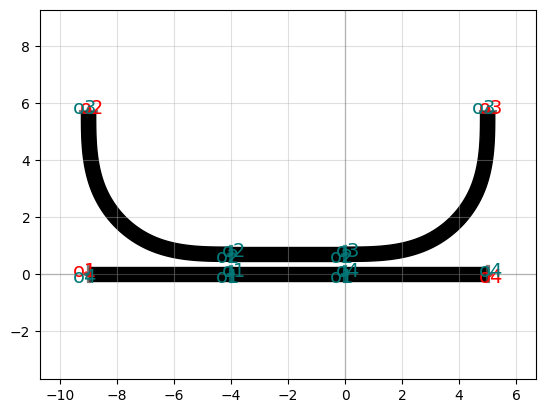

coupler_ring: uid 060d22d8, ports ['o2', 'o1', 'o3', 'o4'], references ['coupler90_1', 'coupler90_2', 'coupler_straight_1'], 0 polygons

In [3]:
# Lets look at the layout of a coupler_ring
gf.components.coupler_ring()

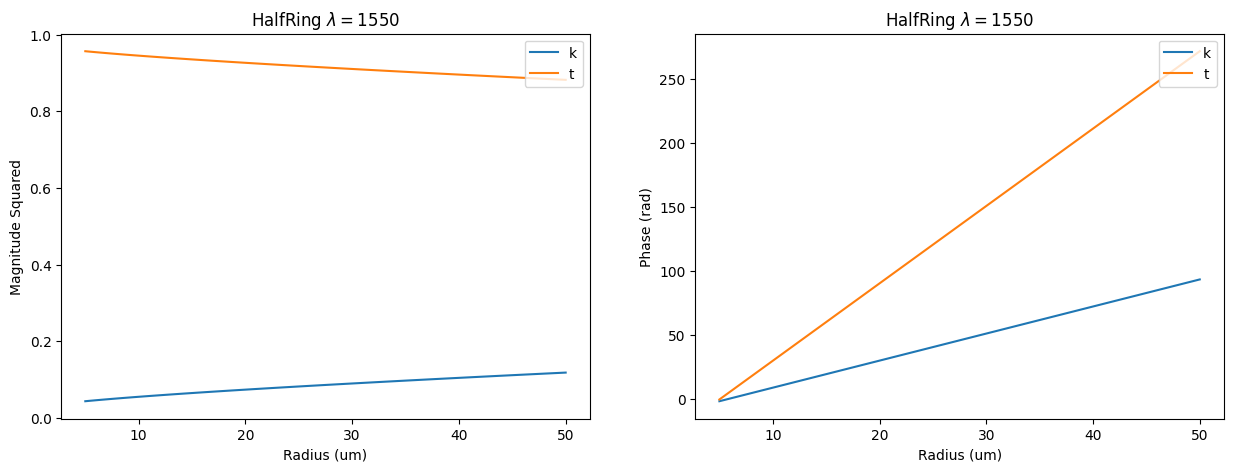

In [4]:
hr = gs.coupler_ring()
r = np.linspace(5000, 50000, 100)
wavelength = 1550
hr.update(radius=r)

k = hr.predict((1, 4), wavelength)
t = hr.predict((1, 3), wavelength)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(r / 1e3, np.abs(k) ** 2, label="k")
plt.plot(r / 1e3, np.abs(t) ** 2, label="t")
pltAttr("Radius (um)", "Magnitude Squared", "HalfRing $\lambda=1550$")

plt.subplot(122)
plt.plot(r / 1e3, np.unwrap(np.angle(k)), label="k")
plt.plot(r / 1e3, -np.unwrap(np.angle(t)), label="t")
pltAttr("Radius (um)", "Phase (rad)", "HalfRing $\lambda=1550$")

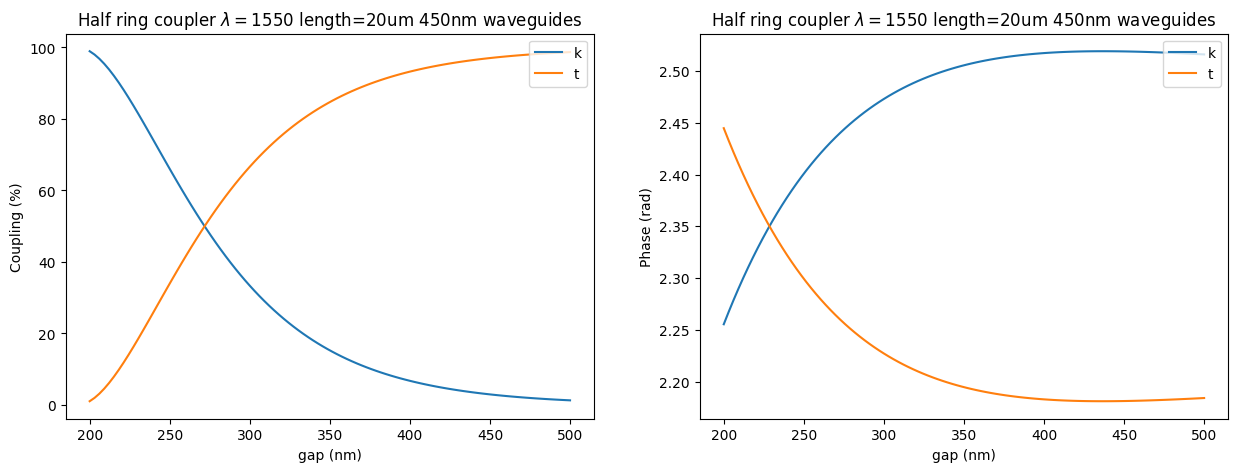

In [5]:
hr = gs.coupler_ring(width=0.45, length_x=20.0)
gap = np.linspace(200, 500, 100)
wavelength = 1550
hr.update(gap=gap)

k = hr.predict((1, 4), wavelength)
t = hr.predict((1, 3), wavelength)

title = "Half ring coupler $\lambda=1550$ length=20um 450nm waveguides"
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(gap, np.abs(k) ** 2 * 100, label="k")
plt.plot(gap, np.abs(t) ** 2 * 100, label="t")
pltAttr("gap (nm)", "Coupling (%)", title)

plt.subplot(122)
plt.plot(gap, np.unwrap(np.angle(k)), label="k")
plt.plot(gap, -np.unwrap(np.angle(t)), label="t")
pltAttr("gap (nm)", "Phase (rad)", title)

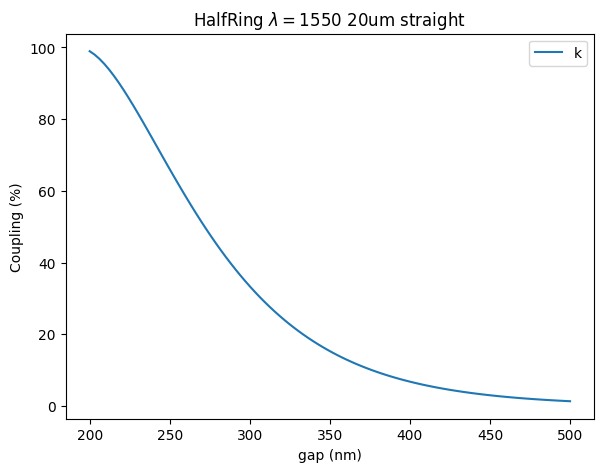

In [6]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(gap, np.abs(k) ** 2 * 100, label="k")
pltAttr("gap (nm)", "Coupling (%)", "HalfRing $\lambda=1550$ 20um straight")

## Coupler

Model for evanescent coupler

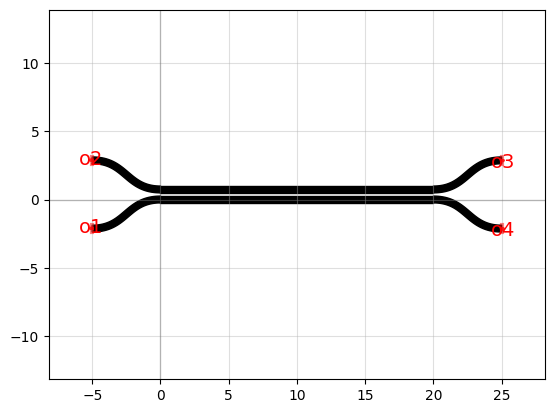

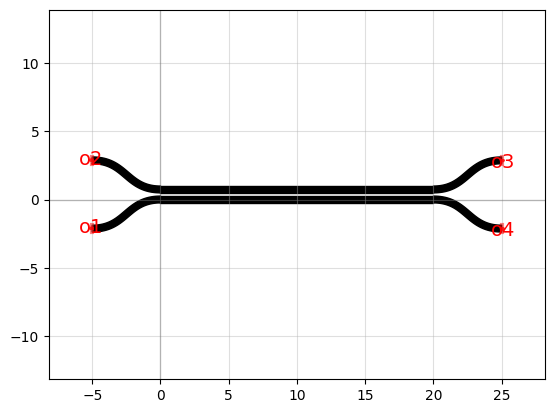

In [7]:
gap = 0.236
length = 20.0
width = 0.5
dx = 5.0
dy = 5.0

coupler_layout = gf.components.coupler(
    gap=gap, length=length, width=width, dx=dx, dy=dy
)
coupler_layout.plot()

In [8]:
# lets see the default parameters for the circuit model
gs.coupler?

In [9]:
# lets see the different parameters for the layout
gf.components.coupler?

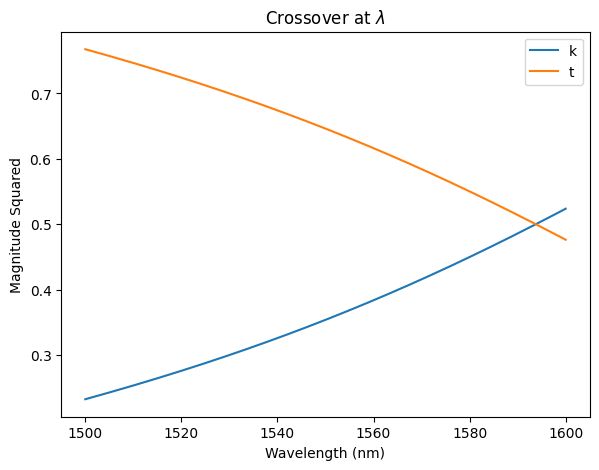

In [10]:
c = gs.coupler(gap=gap, length=length, width=width, dx=dx, dy=dy)

wavelength = np.linspace(1500, 1600, 500)
k = c.predict((1, 4), wavelength)
t = c.predict((1, 3), wavelength)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(wavelength, np.abs(k) ** 2, label="k")
plt.plot(wavelength, np.abs(t) ** 2, label="t")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Magnitude Squared")
plt.title("Crossover at $\lambda \approx 1550nm$")
plt.legend()

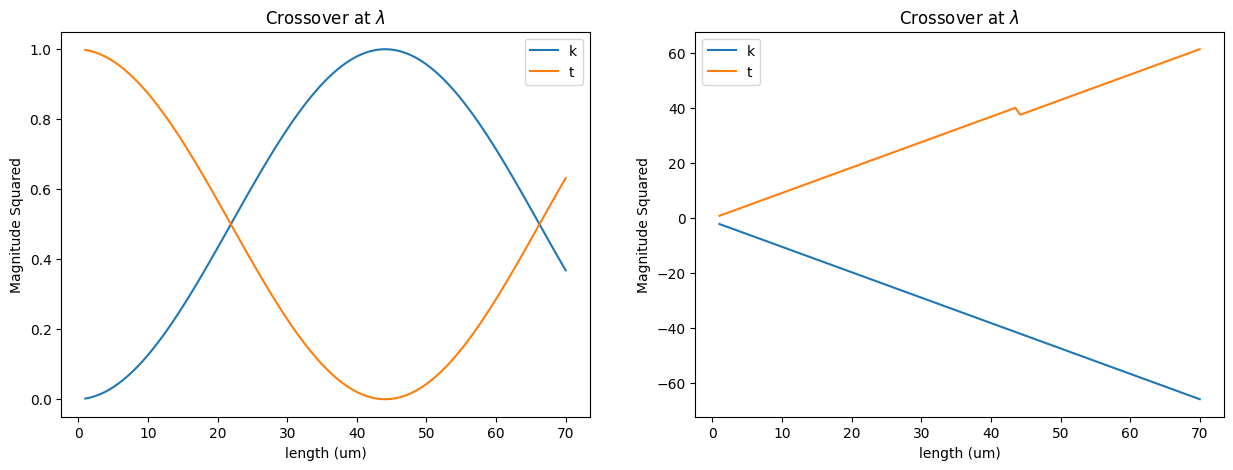

In [11]:
hr = gs.coupler()
length = np.linspace(1, 70, 100) * 1e3
wavelength = 1550
hr.update(length=length)

k = hr.predict((1, 4), wavelength)
t = hr.predict((1, 3), wavelength)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(length / 1e3, np.abs(k) ** 2, label="k")
plt.plot(length / 1e3, np.abs(t) ** 2, label="t")
plt.xlabel("length (um)")
plt.ylabel("Magnitude Squared")
plt.title("Crossover at $\lambda \approx 1550nm$")
plt.legend()

plt.subplot(122)
plt.plot(length / 1e3, np.unwrap(np.angle(k)), label="k")
plt.plot(length / 1e3, -np.unwrap(np.angle(t)), label="t")
plt.xlabel("length (um)")
plt.ylabel("Magnitude Squared")
plt.title("Crossover at $\lambda \approx 1550nm$")
plt.legend()

Reproducing numbers from [thesis](https://www.photonics.intec.ugent.be/download/phd_216.pdf) page 88

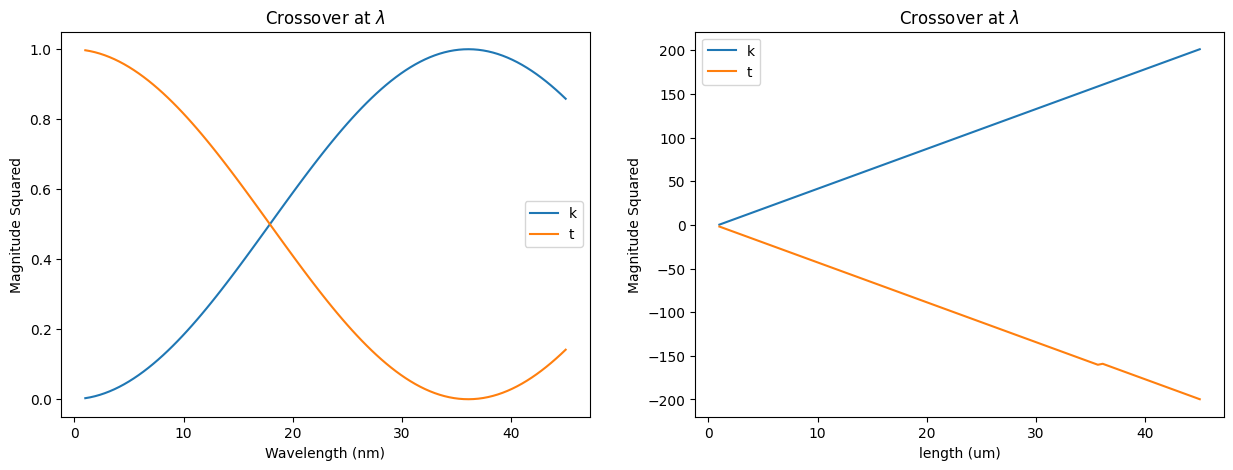

In [12]:
hr = gs.coupler(length=10, gap=0.25, width=0.450)
length = np.linspace(1, 45, 100) * 1e3
wavelength = 1550
hr.update(length=length)

k = hr.predict((1, 4), wavelength)
t = hr.predict((1, 3), wavelength)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(length / 1e3, np.abs(k) ** 2, label="k")
plt.plot(length / 1e3, np.abs(t) ** 2, label="t")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Magnitude Squared")
plt.title("Crossover at $\lambda \approx 1550nm$")
plt.legend()

plt.subplot(122)
plt.plot(length / 1e3, np.unwrap(np.angle(k)), label="k")
plt.plot(length / 1e3, -np.unwrap(np.angle(t)), label="t")
plt.xlabel("length (um)")
plt.ylabel("Magnitude Squared")
plt.title("Crossover at $\lambda \approx 1550nm$")
plt.legend()

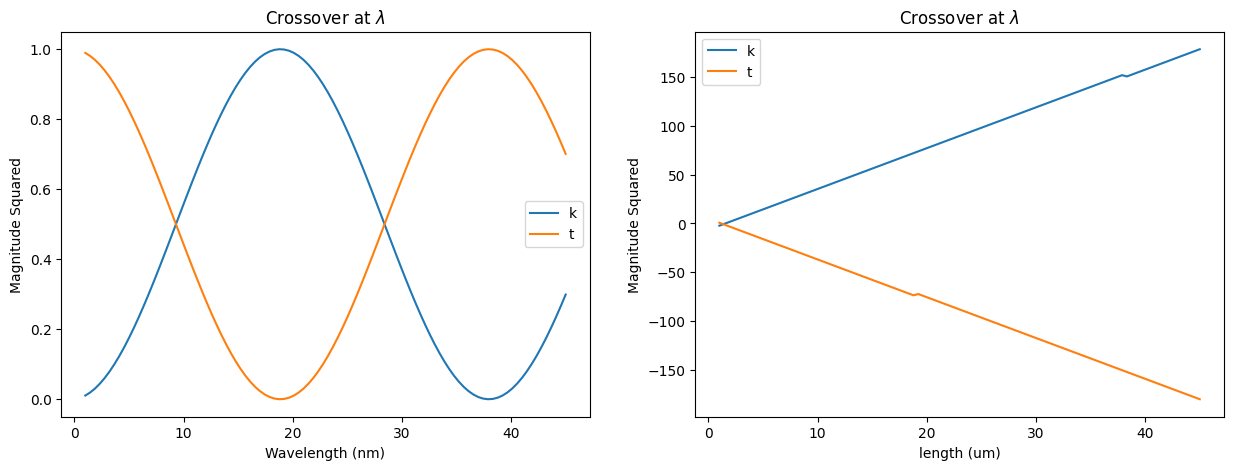

In [13]:
hr = gs.coupler(length=10, gap=0.13, width=0.5)
length = np.linspace(1, 45, 100) * 1e3
wavelength = 1550
hr.update(length=length)

k = hr.predict((1, 4), wavelength)
t = hr.predict((1, 3), wavelength)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(length / 1e3, np.abs(k) ** 2, label="k")
plt.plot(length / 1e3, np.abs(t) ** 2, label="t")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Magnitude Squared")
plt.title("Crossover at $\lambda \approx 1550nm$")
plt.legend()

plt.subplot(122)
plt.plot(length / 1e3, np.unwrap(np.angle(k)), label="k")
plt.plot(length / 1e3, -np.unwrap(np.angle(t)), label="t")
plt.xlabel("length (um)")
plt.ylabel("Magnitude Squared")
plt.title("Crossover at $\lambda \approx 1550nm$")
plt.legend()

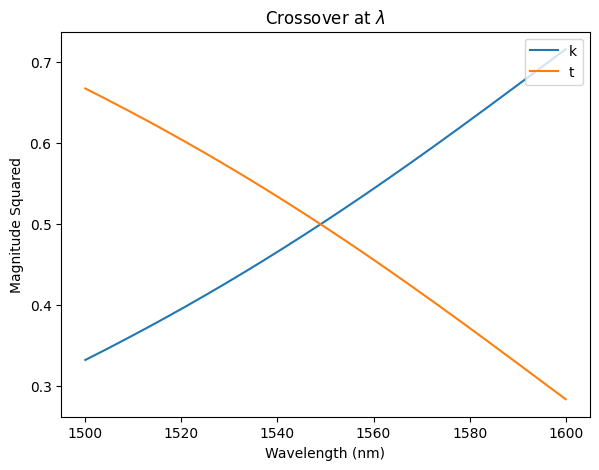

In [14]:
c50 = gs.coupler(length=18, gap=0.25, width=0.45)
wavelength = np.linspace(1500, 1600, 500)
k = c50.predict((1, 4), wavelength)
t = c50.predict((1, 3), wavelength)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(wavelength, np.abs(k) ** 2, label="k")
plt.plot(wavelength, np.abs(t) ** 2, label="t")
pltAttr("Wavelength (nm)", "Magnitude Squared", "Crossover at $\lambda \approx 1550nm$")

Text(0.5, 1.0, '2 mm coupling $\\lambda=1550$')

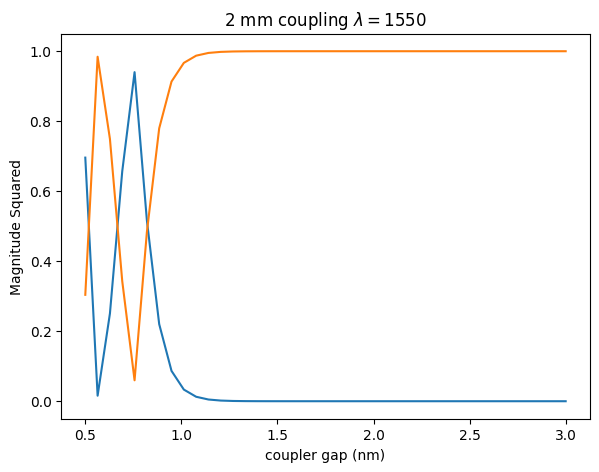

In [15]:
import numpy as np
import matplotlib.pyplot as plt

hr = gs.coupler_ring(length_x=2e3, width=0.45)
gap = np.linspace(0.5, 3, 40) * 1e3
wavelength = 1550
hr.update(gap=gap)

k = hr.predict((1, 4), wavelength)
t = hr.predict((1, 3), wavelength)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(gap / 1e3, np.abs(k) ** 2, label="k")
plt.plot(gap / 1e3, np.abs(t) ** 2, label="t")
plt.xlabel("coupler gap (nm)")
plt.ylabel("Magnitude Squared")
plt.title("2 mm coupling $\lambda=1550$")

Text(0, 0.5, 'Magnitude Squared')

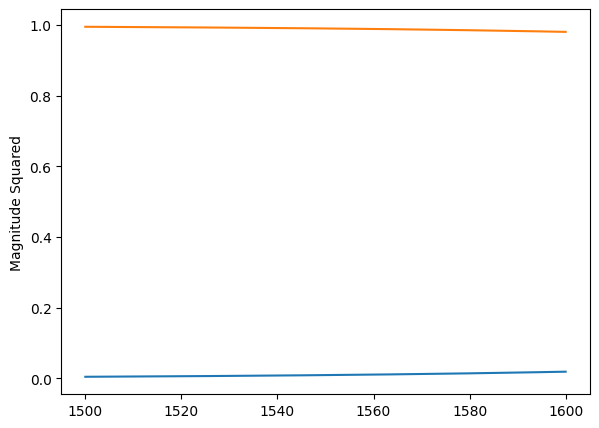

In [16]:
c = gs.coupler_ring(length_x=20, wg_width=0.45, gap=0.45)
wavelength = np.linspace(1500, 1600, 500)
k = c.predict((1, 4), wavelength)
t = c.predict((1, 3), wavelength)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(wavelength, np.abs(k) ** 2, label="k")
plt.plot(wavelength, np.abs(t) ** 2, label="t")
plt.ylabel("Magnitude Squared")

Text(0.5, 1.0, '20um long 450nm wide 450nm gap straight waveguides')

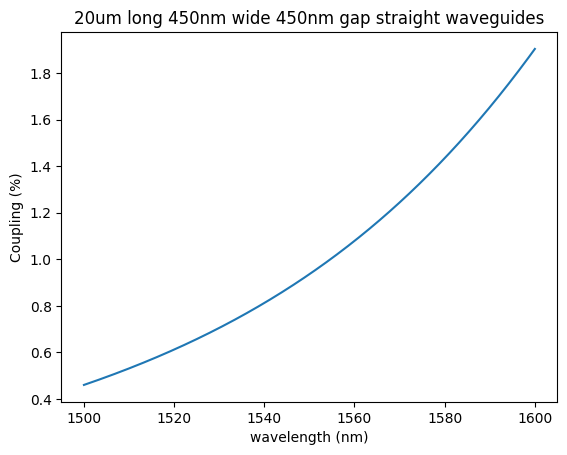

In [17]:
plt.plot(wavelength, np.abs(k) ** 2 * 100, label="k")
plt.ylabel("Coupling (%)")
plt.xlabel("wavelength (nm)")
plt.title("20um long 450nm wide 450nm gap straight waveguides")